## Machine Learning HW2
## Xiaoyang Zhang          B00708854

In [3181]:
import pandas as pd 
import numpy as np
import random
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
%matplotlib inline

### Question 1.

#### 1.

In [3182]:
#someone has generated data by sampling the sinusoidal function f(x) = sin(2pix)  x is between [0,1]
N_train = 200
i_train = np.arange(N_train) # [0...199]

In [3183]:
X_train = i_train / (N_train - 1) #[0...1, 0.005 alternative]

In [3184]:
Y_ground_true = np.sin(2*math.pi*X_train) 

In [3185]:
Y_noise = Y_ground_true + np.random.normal(0, 0.1, N_train) # white Gaussian noise

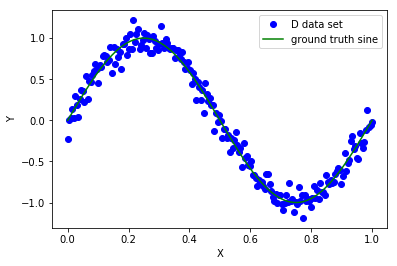

In [3186]:
plt.plot(X_train, Y_noise, 'ro',color='blue', label='D data set')
plt.plot(X_train, Y_ground_true, color='green', label='ground truth sine')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3187]:
# Generate a dataset D_set consisting of N = 200
X_buf = np.array([X_train])
Y_buf = np.array([Y_noise])
D_set = np.concatenate((X_buf,Y_buf),axis=0).T
D = D_set.tolist()

#### 2.

Parameter set : sub test set, lambda, order

In [3188]:
#D is [X_buf[i], Y_buf[i]]
subD_10 = random.sample(D, 10)
subD_50 = random.sample(D, 50)
subD_100 = random.sample(D, 100)
subD_150 = random.sample(D, 150)
subD_200 = random.sample(D, 200)
subD_200_test = random.sample(D, 200)
subD_array = [subD_10, subD_50, subD_100, subD_150, subD_200, subD_200_test]

In [3189]:
lambda0 = 0
lambda1 = 0.00006
lambda2 = 0.00007
lambda3 = 0.000075
lambda4 = 0.00008
lambda_array = [lambda0, lambda1, lambda2, lambda3, lambda4]

In [3190]:
order0 = 0
order1 = 1
order2 = 2
order3 = 3
order9 = 9
order_array = [order0, order1, order2, order3, order9]

## Below part is version 1, only for debugging
single training case

In [3191]:
subD = subD_10 #list, manual modify
test_qty = 200
qty = len(subD)
order = 9 #manual modify
lambda_v = lambda0 #manual modify
#above are input parameters
subD.sort()
subD_temp = np.array(subD)
subD_X = subD_temp.T[0]
subD_Y = subD_temp.T[1]

In [3192]:
#def create_X(X_input):
#    X_temp = X_input.tolist()
#    sub = np.ones([1,order])
#    for x in X_temp:
#        temp = np.array([[x, pow(x,2), pow(x,3)]]) # order == 3, should modify, follow order, hard code
#        sub = np.concatenate((sub,temp),axis=0)
#    sub = np.delete(sub,0,axis=0)
#    return sub

#X_sub = create_X(subD_X)

In [3193]:
X = np.array([np.ones(qty,int)]).T # first col is 1, all 1
for i in range(1, order+1):
    temp = np.array([np.power(subD_X,i)])
    X = np.concatenate((X,temp.T),axis=1)
    
Y = np.array([subD_Y]).T
E = np.eye(order+1)
E[0][0] = 0

In [3194]:
theta = np.dot(np.dot(np.linalg.inv((np.dot(X.T,X) + lambda_v*E)), X.T),Y)

In [3195]:
#theta.T[0].tolist()

In [3196]:
#this block is for testing
#what I want to do is to create ground truth y and test y, than calculate the MSE
test_X_ground = create_subD_X(subD_200_test)
test_Y_ground = np.sin(2*math.pi*test_X_ground) 

test_X_array = np.array([np.ones(test_qty,int)]).T # first col is 1, all 1
for i in range(1, order+1):
    temp = np.array([np.power(test_X_ground,i)])
    test_X_array = np.concatenate((test_X_array,temp.T),axis=1)

test_Y_result = np.dot(test_X_array, theta)

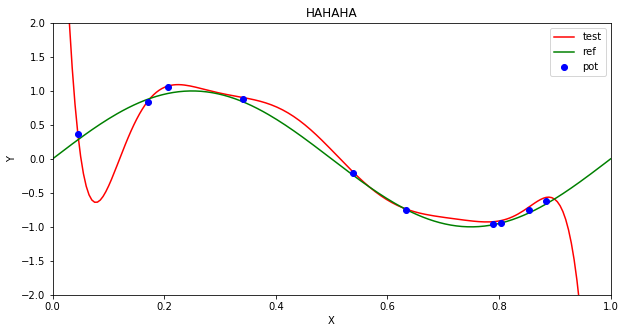

In [3197]:
plt.figure(num=0, figsize=(10, 5))
plt.title('HAHAHA')
plt.plot(test_X_ground, test_Y_result,color='red', label='test')
plt.plot(test_X_ground, test_Y_ground,color='green', label='ref')
plt.plot(subD_X, subD_Y, 'ro', color='blue', label='pot')
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3198]:
mean_squared_error(test_Y_result, test_Y_ground)

4.7842102546473715

## Above is first version, for debugging

## Below is second version, for submitting

Using function:

In [3199]:
# no change
def create_subD_X(subDataSet):
    subDataSet.sort()
    temp = np.array(subDataSet)
    return temp.T[0]
def create_subD_Y(subDataSet):
    subDataSet.sort()
    temp = np.array(subDataSet)
    return temp.T[1]

In [3200]:
def create_MSE_set(subD_set, lambda_set, order_set):
    Mse_set = []
    theta_set = []
    len_subD_set = len(subD_set)-1 # the last one is test set, so ignore here
    len_lambda_set = len(lambda_set)
    len_order_set = len(order_set)
    sub_50_test = subD_set[len_subD_set] # the last one in subD_set, only for testing
    qty_test = len(sub_50_test)
    
    for l in range(0,len_lambda_set):
        lamb = lambda_set[l]
        for o in range(0,len_order_set):
            order = order_set[o]
            E = np.eye(order+1)
            E[0][0] = 0
            for s in range(0,len_subD_set):
                sub = subD_set[s]
                quantity = len(sub)
                sub_X = create_subD_X(sub)
                sub_Y = create_subD_Y(sub)
                
                Xc = np.array([np.ones(quantity,int)]).T # first col is 1, all 1
                for i in range(1, order+1):
                    temp = np.array([np.power(sub_X,i)])
                    Xc = np.concatenate((Xc,temp.T),axis=1)
                    
                Yc = np.array([sub_Y]).T
                
                #get theta
                theta = np.dot(np.dot(np.linalg.inv((np.dot(Xc.T,Xc) + lamb*E)), Xc.T) ,Yc)
                #create theta set
                theta_set.append(theta.T[0].tolist())
                
                #get MSE
                t_X_ground = create_subD_X(sub_50_test)
                t_Y_ground = np.sin(2*math.pi*t_X_ground)
                
                t_X_array = np.array([np.ones(qty_test,int)]).T
                for i in range(1, order+1):
                    temp = np.array([np.power(t_X_ground,i)])
                    t_X_array = np.concatenate((t_X_array,temp.T),axis=1)
                    
                t_Y_result = np.dot(t_X_array, theta)
                
                t_MSE = mean_squared_error(t_Y_result, t_Y_ground)
                
                
                #create MSE set
                Mse_set.append(t_MSE)
                              
    return theta_set, Mse_set

In [3201]:
theta_all, mse_all = create_MSE_set(subD_array, lambda_array, order_array)
print (len(theta_all))
print (len(mse_all))

125
125


In [3202]:
# theta set, contain 125 different models
theta_lam0 = theta_all[0:25]
theta_lam1 = theta_all[25:50]
theta_lam2 = theta_all[50:75]
theta_lam3 = theta_all[75:100]
theta_lam4 = theta_all[100:125]

In [3203]:
mse0 = mse_all[0:25] # lam0
mse1 = mse_all[25:50] # lam1
mse2 = mse_all[50:75] # lam2
mse3 = mse_all[75:100] # lam3
mse4 = mse_all[100:125] # lam4

## Below part is for graph & theta set

In [3204]:
def display(lambda_value, mse_set):
    X_array = np.array([10,50,100,150,200])
    name = 'lambda is :' + str(lambda_value)
    #create figure
    plt.figure(figsize=(5, 5))
    #title
    plt.title(name)
    #plot 1
    plt.plot(X_array, mse_set[0:5], color='red', label='order 0')
    #plot 2
    plt.plot(X_array, mse_set[5:10],'-.' ,color='blue', label='order 1')
    #plot 3
    plt.plot(X_array, mse_set[10:15], color='orange', label='order 2')
    #plot 4
    plt.plot(X_array, mse_set[15:20], color='green', label='order 3')
    #plot 5
    plt.plot(X_array, mse_set[20:25], ':', color='black', label='order 9')
    #set axis range
    plt.xlim((0, 200))
    plt.ylim((0, 0.6))
    #set aixs name
    plt.xlabel('# of training data')
    plt.ylabel('MSE')
    #set aixs mark
    my_x_ticks = np.array([0,10,50,100,150,200])
    my_y_ticks = np.arange(-0.1, 0.6, 0.05)
    plt.xticks(my_x_ticks)
    plt.yticks(my_y_ticks)
    #legned
    plt.legend()
    #display figure
    plt.show()

In [3205]:
import pandas as pd
def display_theta(theta_set):
    buffer = theta_set[slice(4,25,5)]
    d = {'order 0' : pd.Series(np.around(buffer[0],2), index=['w0']),
         'order 1' : pd.Series(np.around(buffer[1],2), index=['w0', 'w1']),
         'order 2' : pd.Series(np.around(buffer[2],2), index=['w0', 'w1', 'w2']),
         'order 3' : pd.Series(np.around(buffer[3],2), index=['w0', 'w1', 'w2', 'w3']),
         'order 9' : pd.Series(np.around(buffer[4],2), index=['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9']),
        }
    df = pd.DataFrame(d)
    print(df)

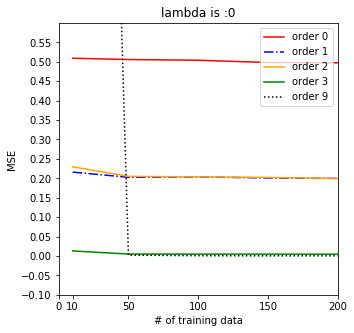

    order 0  order 1  order 2  order 3   order 9
w0      0.0     0.93     0.93    -0.20     -0.14
w1      NaN    -1.87    -1.83    11.83     14.86
w2      NaN      NaN    -0.04   -34.28   -140.64
w3      NaN      NaN      NaN    22.82    997.13
w4      NaN      NaN      NaN      NaN  -4175.15
w5      NaN      NaN      NaN      NaN  10016.53
w6      NaN      NaN      NaN      NaN -14386.42
w7      NaN      NaN      NaN      NaN  12363.38
w8      NaN      NaN      NaN      NaN  -5880.99
w9      NaN      NaN      NaN      NaN   1191.45


In [3206]:
#figure 0, lam0
display(lambda0, mse0)
display_theta(theta_lam0)

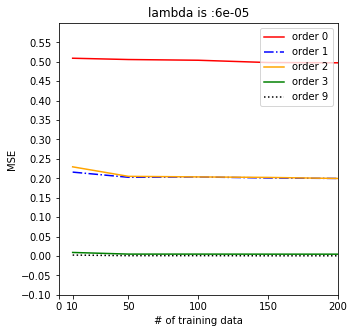

    order 0  order 1  order 2  order 3  order 9
w0      0.0     0.93     0.93    -0.19    -0.08
w1      NaN    -1.87    -1.83    11.79     8.58
w2      NaN      NaN    -0.04   -34.18   -15.03
w3      NaN      NaN      NaN    22.76   -12.63
w4      NaN      NaN      NaN      NaN    10.34
w5      NaN      NaN      NaN      NaN    15.72
w6      NaN      NaN      NaN      NaN     5.35
w7      NaN      NaN      NaN      NaN    -6.50
w8      NaN      NaN      NaN      NaN    -8.90
w9      NaN      NaN      NaN      NaN     3.10


In [3207]:
#figure 1, lam1
display(lambda1, mse1)
display_theta(theta_lam1)

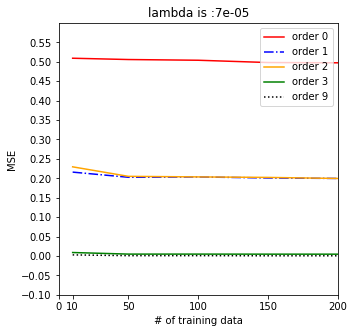

    order 0  order 1  order 2  order 3  order 9
w0      0.0     0.93     0.93    -0.19    -0.08
w1      NaN    -1.87    -1.83    11.78     8.64
w2      NaN      NaN    -0.04   -34.16   -15.47
w3      NaN      NaN      NaN    22.75   -11.62
w4      NaN      NaN      NaN      NaN     9.97
w5      NaN      NaN      NaN      NaN    14.85
w6      NaN      NaN      NaN      NaN     5.25
w7      NaN      NaN      NaN      NaN    -5.72
w8      NaN      NaN      NaN      NaN    -8.19
w9      NaN      NaN      NaN      NaN     2.32


In [3208]:
#figure 2, lam2
display(lambda2, mse2)
display_theta(theta_lam2)

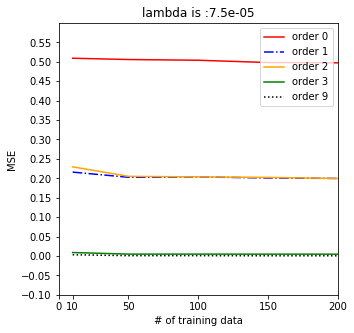

    order 0  order 1  order 2  order 3  order 9
w0      0.0     0.93     0.93    -0.19    -0.08
w1      NaN    -1.87    -1.83    11.78     8.66
w2      NaN      NaN    -0.04   -34.15   -15.65
w3      NaN      NaN      NaN    22.74   -11.19
w4      NaN      NaN      NaN      NaN     9.81
w5      NaN      NaN      NaN      NaN    14.48
w6      NaN      NaN      NaN      NaN     5.21
w7      NaN      NaN      NaN      NaN    -5.39
w8      NaN      NaN      NaN      NaN    -7.89
w9      NaN      NaN      NaN      NaN     1.99


In [3209]:
#figure 3, lam3
display(lambda3, mse3)
display_theta(theta_lam3)

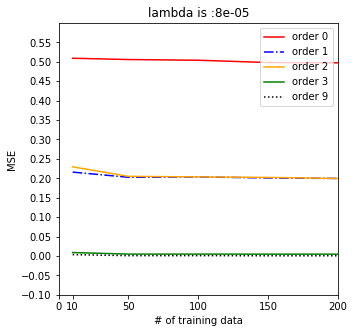

    order 0  order 1  order 2  order 3  order 9
w0      0.0     0.93     0.93    -0.19    -0.08
w1      NaN    -1.87    -1.83    11.78     8.68
w2      NaN      NaN    -0.04   -34.14   -15.81
w3      NaN      NaN      NaN    22.74   -10.80
w4      NaN      NaN      NaN      NaN     9.66
w5      NaN      NaN      NaN      NaN    14.15
w6      NaN      NaN      NaN      NaN     5.18
w7      NaN      NaN      NaN      NaN    -5.09
w8      NaN      NaN      NaN      NaN    -7.62
w9      NaN      NaN      NaN      NaN     1.68


In [3210]:
#figure 4, lam4
display(lambda4, mse4)
display_theta(theta_lam4)

#### 3.

In [3211]:
N_test = 199
X_test = X_train + 10/(2*(N_train-1))
X_test = np.delete(X_test,len(X_test)-1,axis=0)  #[0...198]
Y_test_ref = np.sin(2*math.pi*X_test)

In [3212]:
# Generate a dataset D_set consisting of N = 200
X_test_buf = np.array([X_test])
Y_test_buf = np.array([Y_test_ref])
D_test_set_ref_buf = np.concatenate((X_test_buf,Y_test_buf),axis=0).T
D_test_ref = D_test_set_ref_buf.tolist()

In [3213]:
subD_test_comp_array = [subD_10, subD_50, subD_100, subD_150, subD_200, D_test_ref]

In [3214]:
theta_all_useless, mse_all_test = create_MSE_set(subD_test_comp_array, lambda_array, order_array)

In [3215]:
mse0_test = mse_all_test[0:25] # lam0
mse1_test = mse_all_test[25:50] # lam1
mse2_test = mse_all_test[50:75] # lam2
mse3_test = mse_all_test[75:100] # lam3
mse4_test = mse_all_test[100:125] # lam4

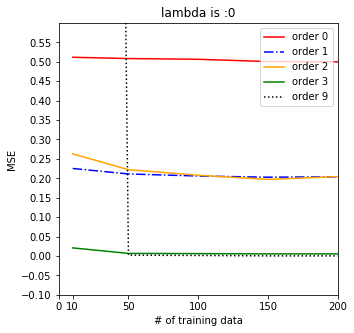

In [3216]:
display(lambda0, mse0_test)

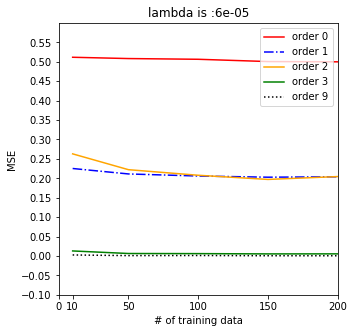

In [3217]:
display(lambda1, mse1_test)

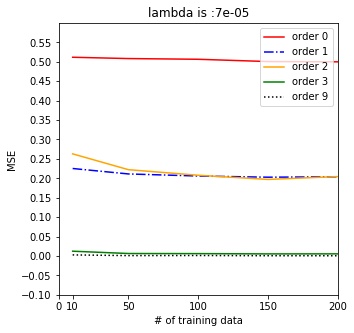

In [3218]:
display(lambda2, mse2_test)

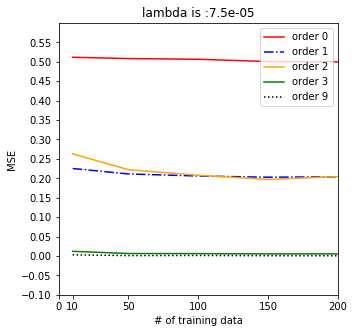

In [3219]:
display(lambda3, mse3_test)

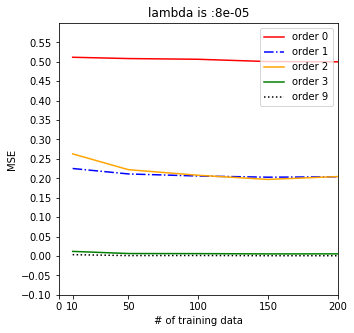

In [3220]:
display(lambda4, mse4_test)

#### 4. conclustion

**which one has the best performance and why?**

A: In my case, the model with higher order(order 3 and 9) and enough training data set(larger than 100) has the best performance.
   Higher order are more flexible, it can make the model fit the original data samples well. 
   But complex Models is always with High Variance.
   If the training data set was small, it is very easy to get over fitting, just like below.
   When I increase the training data set up to 200 samples, the performance is better.
   
   What's more, appropriate lambda is good for performance. In my case, the model has the best performance when lambda is between 0.00007 to 0.00008.
   Because the lambda can modify the weight of regularization, which can penalize coefficient values.
   It is one way to control the over fitting, especially in the case when there is no enough training data. (for example: 10~50 training data in this question)
   
**Which one has the worst performance and why?**

A: The one with less training case and high order, no regularization(lambda == 0) has the worst performance.
   The reason just like the explaination in above question.

**How about the balance of variance and bias?**

A: variance and bias are trade-off performance, it is impossible to get best performance on both of them.
   In order to get better bias performance, some variance performance should be sacrificed:
   Smaller lambda should be used.
   Using high order model.
   In order to get better variance performance, some bias performance should be sacrificed:
   Larger lambda should be used.
   Using lower order model.
   Using large training data set.

### Question 2.

### preprocessing 

In [3221]:
import pandas as pd
import time
df = pd.read_csv('ionosphere.data.txt',sep=',')
df.describe()

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,1.24,1.25,1.26,1.27,1.28,1.29,1.30,1.31,1.32,1.33
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3222]:
def shuffle_data(df_in):
    arr = np.array(df_in)
    np.place(arr, arr=='g', 1)
    np.place(arr, arr=='b', 0)
    np.random.shuffle(arr)
    train = arr[0:301]
    test = arr[301:351]
    
    train_X = np.ones([1,301]).T
    train_X = np.concatenate((train_X,train[:,0:34]),axis=1) # 0~34 feature (0 + 1~34 features) 
    #train_X = train[:,0:34] 
    train_Y = train[:,34] # no. 34 feature is output
    
    test_X = np.ones([1,50]).T
    test_X = np.concatenate((test_X,test[:,0:34]),axis=1) # 0~34 feature (0 + 1~34 features)
    #test_X = test[:,0:34]
    test_Y = test[:,34]
    return train_X, train_Y, test_X, test_Y

### choose logistic regression as the classification model

In [3223]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

## below block is only for debugging

In [3224]:
alpha = 0.1
iteration = 1
m, n = np.shape(test_set_X) # m is # of test points, n is # of features
new_alpha = alpha/m
theta_vector = np.ones([1,n]) # [1 * n]
theta_vector_temp = np.zeros([1,n])
for i in range(iteration):
    temp0 = np.dot(theta_vector, test_set_X.T) # [1 * n] * [n * m] -> [1 * m]
    temp_buf = np.array(temp0.tolist())
    #print(temp_buf)
    temp1 = sigmoid(temp_buf) # [1 * m]
    #print(temp1)
    temp2 = temp1 - test_set_Y.T # [1 * m]
    #print(temp2)
    for j in range(0,n):
        temp3 = np.multiply(temp2, test_set_X[:,j]) # [1 * m]
        theta_vector_temp[0][j] = theta_vector[0][j] - new_alpha * np.sum(temp3) # 1
        #print(theta_vector_temp)
    theta_vector = theta_vector_temp
    #print(i)
    #print(theta_vector)

## above block is only for debugging

In [3225]:
def checkJ(train_x, train_y, theta_vector):
    m, n = np.shape(train_x)
    temp0 = np.dot(theta_vector, train_x.T) # [1*n] * [n*m]
    temp_buf = np.array(temp0.tolist()) # [1*m]
    temp1 = sigmoid(temp_buf) # [1*m]
    temp2 = np.multiply(train_y, np.log(temp1+0.000000000000000000000000001))
    temp3 = np.multiply((1-train_y), np.log(1-temp1+0.000000000000000000000000001))                    
    J_value = -1/m * np.sum(temp2 + temp3)
    return J_value
    

In [3226]:
def LR_Test(theta_set, test_x, test_y):
    m, n = np.shape(test_x) # m is # of points, n is # of features
    matchCount = 0
    for i in range(m):
        test = np.array(np.dot(theta_set, test_x[i].T).tolist())
        predict = test[0] > 0
        if predict == bool(test_y[i]):
            matchCount += 1
        accuracy = float(matchCount) / m
    return accuracy

In [3227]:
def LR_GD(train_x, train_y, test_x, test_y, alpha, iteration): # train_x: m * n; train_y: m * 1
    startTime = time.time()
    train_accuracy_set = []
    test_accuracy_set = []
    J_min = 50000 # default max cost value
    m, n = np.shape(train_x) # m is # of test points, n is # of features
    new_alpha = alpha/m
    theta_vector = np.full((1,n),1) # [1 * n]
    best_theta_vector = np.full((1,n),1)
    for i in range(iteration):
        temp0 = np.dot(theta_vector, train_x.T) # [1 * n] * [n * m] -> [1 * m]
        temp1 = sigmoid(np.array(temp0.tolist())) - train_y.T # [1 * m]
        temp2 = np.multiply(temp1, train_x.T) # [1 * m]
        theta_vector = theta_vector - new_alpha * np.sum(temp2, axis=1)
        
        J = checkJ(train_x, train_y, theta_vector)
        if(J < J_min):
            best_theta_vector = theta_vector
            J_min = J
        train_accuracy_set.append(LR_Test(best_theta_vector, train_x, train_y))
        test_accuracy_set.append(LR_Test(best_theta_vector, test_x, test_y))
        
    print('time >> %fs' %(time.time() - startTime))
    return train_accuracy_set, test_accuracy_set

In [3228]:
def LR_SGD(train_x, train_y, test_x, test_y, alpha, iteration):
    startTime = time.time()
    train_accuracy_set = []
    test_accuracy_set = []
    J_min = 50000 # default max cost value
    m, n = np.shape(train_x) # m is # of points, n is # of features
    new_alpha = alpha/m
    theta_vector = np.full((1,n),1) # [1 * n]
    best_theta_vector = np.full((1,n),1)
    for i in range(iteration):
        for j in range(0,n):
            temp0 = np.dot(theta_vector, train_x.T) # [1 * n] * [n * m] -> [1 * m]
            temp1 = sigmoid(np.array(temp0.tolist())) - train_y.T # [1 * m]
            temp2 = np.multiply(temp1, train_x[:,j]) # [1 * m]
            theta_vector[0][j] = theta_vector[0][j] - new_alpha * np.sum(temp2) # 1
        
        J = checkJ(train_x, train_y, theta_vector)
        if(J < J_min):
            best_theta_vector = theta_vector
            J_min = J
        train_accuracy_set.append(LR_Test(best_theta_vector, train_x, train_y))
        test_accuracy_set.append(LR_Test(best_theta_vector, test_x, test_y))
        
    print('time >> %fs' %(time.time() - startTime))
    return train_accuracy_set, test_accuracy_set

In [3229]:
def display_cost(cost_set, cost_min):
    plt.figure(num=0, figsize=(10, 5))
    plt.title('J(theta) vs Iteration')
    plt.plot(cost_set,color='green')
    plt.xlabel('# of Iteration')
    plt.ylabel('J(theta)')
    plt.show()
    print(cost_min)

In [3230]:
def LR_GD_REG(train_x, train_y, test_x, test_y, alpha, iteration, lambd): # train_x: m * n; train_y: m * 1
    startTime = time.time()
    train_accuracy_set = []
    test_accuracy_set = []
    J_min = 50000 # default max cost value
    m, n = np.shape(train_x) # m is # of test points, n is # of features
    new_alpha = alpha/m
    theta_vector = np.full((1,n),1) # [1 * n]
    best_theta_vector = np.full((1,n),1)
    
    train_x_one = train_x[:,0]
    train_x_rest = train_x[:,1:n]
    for i in range(iteration):
        theta_vector_one = theta_vector[0][0:1]
        theta_vector_rest = theta_vector[0][1:n]
        ## only this part is different
        temp0 = np.dot(theta_vector, train_x.T) # [1 * n] * [n * m] -> [1 * m]
        temp1 = sigmoid(np.array(temp0.tolist())) - train_y.T # [1 * m]
        temp2 = np.multiply(temp1, train_x_rest.T) # [n * m]
        theta_vector_rest = theta_vector_rest - new_alpha * (np.sum(temp2, axis=1) - lambd*theta_vector_rest)
        ## in np.sum(X, axis=?), no matter axis is 1 or 0, the result should be one row.  
        ##
        theta_vector = np.concatenate((np.array([theta_vector_one]), np.array([theta_vector_rest])),axis=1)
        J = checkJ(train_x, train_y, theta_vector)
        if(J < J_min):
            best_theta_vector = theta_vector
            J_min = J
        train_accuracy_set.append(LR_Test(best_theta_vector, train_x, train_y))
        test_accuracy_set.append(LR_Test(best_theta_vector, test_x, test_y))
        
    print('time >> %fs' %(time.time() - startTime))
    return train_accuracy_set, test_accuracy_set

### note about below steps:
Line 1: shuffle data, split data into training and testing part

Line 2: LR_GD with runing time

Line 3: plot and show best theta set

Line 4: using the best thera set to test

In [3231]:
#train_set_X, train_set_Y, test_set_X, test_set_Y = shuffle_data(df)
#cost_min, cost_set, best_theta = LR_GD(test_set_X, test_set_Y, 3, 20)
#display_cost(cost_set, cost_min)
#print(LR_Test(best_theta, test_set_X, test_set_Y))

#print('==========================')

#cost_min, cost_set, best_theta = LR_GD_REG(test_set_X, test_set_Y, 3, 20, 0)
#display_cost(cost_set, cost_min)
#print(LR_Test(best_theta, test_set_X, test_set_Y))

In [3232]:
#train_set_X, train_set_Y, test_set_X, test_set_Y = shuffle_data(df)
#cost_min, cost_set, best_theta = LR_SGD(test_set_X, test_set_Y, 0.01, 5)
#display_cost(cost_set, cost_min)
#LR_Test(best_theta, test_set_X, test_set_Y)

## Below part is tring different learning rates
## Below part is tring different different weights for the regularization term.
Plot the training and testing errors with respect of iterations.

In [3233]:
def display_error(train_acc_set, test_acc_set, rate, iteration, lambd):
    train_error_set = 1 - np.array(train_acc_set)
    test_error_set = 1 - np.array(test_acc_set)
    name = 'training VS testing   rate: ' + str(rate) + '  iteration: ' + str(iteration) + '  lambda: '+ str(lambd)
    #create figure
    plt.figure(figsize=(10, 5))
    #title
    plt.title(name)
    #plot 1
    plt.plot(train_error_set, color='blue', label='training error')
    #plot 2
    plt.plot(test_error_set, color='red', label='testing error')
    #set aixs name
    plt.xlabel('# of iteration')
    plt.ylabel('error')
    #legned
    plt.legend()
    #display figure
    plt.show()

time >> 26.615890s


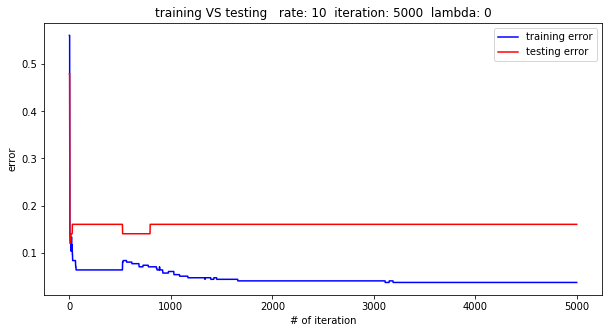

In [3234]:
lambd = 0
rate = 10
iteration = 5000
train_acc_set, test_acc_set = LR_GD(train_set_X, train_set_Y, test_set_X, test_set_Y, rate, iteration)
display_error(train_acc_set, test_acc_set, rate, iteration, lambd)

time >> 0.263014s


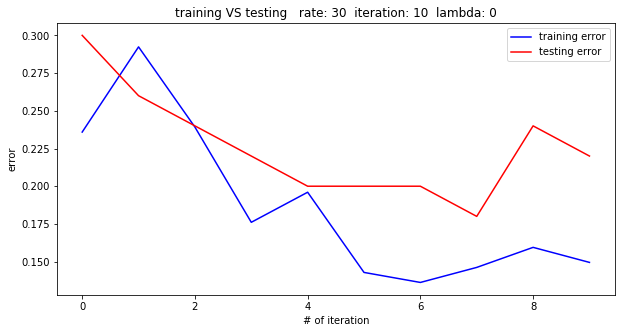

In [3235]:
lambd = 0
rate = 30
iteration = 10
train_acc_set, test_acc_set = LR_SGD(train_set_X, train_set_Y, test_set_X, test_set_Y, rate, iteration)
display_error(train_acc_set, test_acc_set, rate, iteration, lambd)

time >> 22.344032s


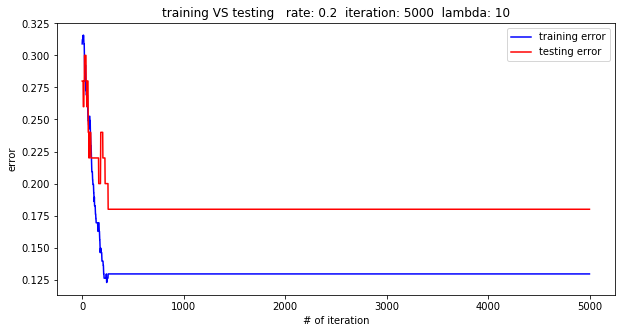

In [3236]:
lambd = 10
rate = 0.2
iteration = 5000
train_acc_set, test_acc_set = LR_GD_REG(train_set_X, train_set_Y, test_set_X, test_set_Y, rate, iteration, lambd)
display_error(train_acc_set, test_acc_set, rate, iteration, lambd)